In [2]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("user_behavior_dataset.csv")
df.head(4)

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User ID                     700 non-null    int64  
 1   Device Model                700 non-null    object 
 2   Operating System            700 non-null    object 
 3   App Usage Time (min/day)    700 non-null    int64  
 4   Screen On Time (hours/day)  700 non-null    float64
 5   Battery Drain (mAh/day)     700 non-null    int64  
 6   Number of Apps Installed    700 non-null    int64  
 7   Data Usage (MB/day)         700 non-null    int64  
 8   Age                         700 non-null    int64  
 9   Gender                      700 non-null    object 
 10  User Behavior Class         700 non-null    int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 60.3+ KB


In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
df.drop("User ID",axis=1,inplace=True)
df

,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3
...,...,...,...,...,...,...,...,...,...,...
695,iPhone 12,iOS,92,3.9,1082,26,381,22,Male,2
696,Xiaomi Mi 11,Android,316,6.8,1965,68,1201,59,Male,4
697,Google Pixel 5,Android,99,3.1,942,22,457,50,Female,2
698,Samsung Galaxy S21,Android,62,1.7,431,13,224,44,Male,1


In [8]:
df.describe()

,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,User Behavior Class
count,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,271.128571,5.272714,1525.158571,50.681429,929.742857,38.482857,2.990000
std,177.199484,3.068584,819.136414,26.943324,640.451729,12.012916,1.401476
min,30.000000,1.000000,302.000000,10.000000,102.000000,18.000000,1.000000
25%,113.250000,2.500000,722.250000,26.000000,373.000000,28.000000,2.000000
50%,227.500000,4.900000,1502.500000,49.000000,823.500000,38.000000,3.000000
75%,434.250000,7.400000,2229.500000,74.000000,1341.000000,49.000000,4.000000
max,598.000000,12.000000,2993.000000,99.000000,2497.000000,59.000000,5.000000


Data is very clean, has no missing values and duplicates.

Let's start with EDA

UNIVARIATE ANALYSIS

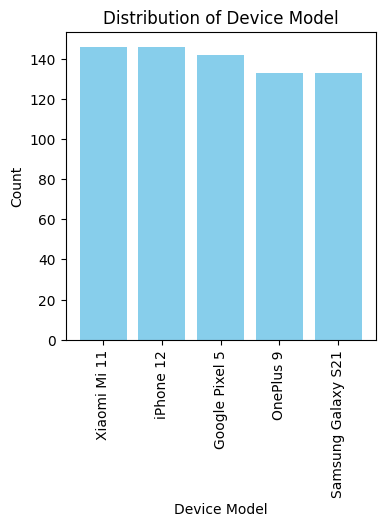

In [9]:
x = df['Device Model'].value_counts().reset_index()
plt.figure(figsize = (4,4))
plt.bar(x['Device Model'], x['count'], color = 'skyblue')
plt.title('Distribution of Device Model')
plt.xlabel('Device Model')
plt.ylabel('Count')
plt.xticks(rotation = 90)
plt.show()

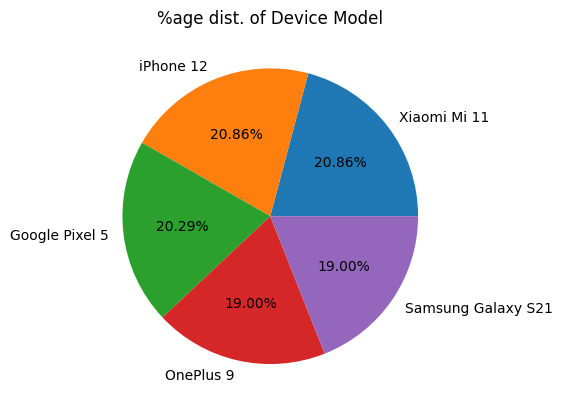

In [10]:
x1 = round((df['Device Model'].value_counts()/df.shape[0])*100,2).reset_index()
labels = x1['Device Model'].to_list()
plt.pie(x1['count'], labels = labels, autopct = '%0.2f%%')
plt.title('%age dist. of Device Model')
plt.show()

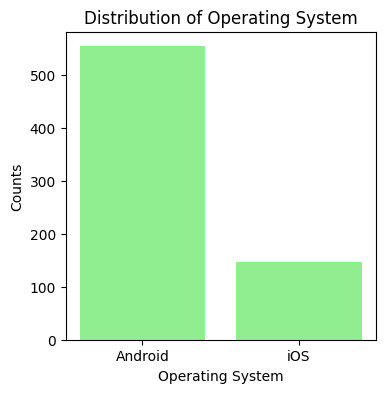

In [11]:
y = df['Operating System'].value_counts().reset_index()
plt.figure(figsize = (4,4))
plt.bar(y['Operating System'], y['count'], color = 'lightgreen')
plt.title('Distribution of Operating System')
plt.xlabel('Operating System')
plt.ylabel('Counts')
plt.show()

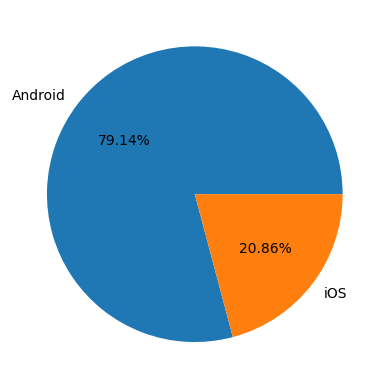

In [12]:
y1 = round((df['Operating System'].value_counts()/df.shape[0])*100,2).reset_index()
labels = y1['Operating System'].to_list()
plt.pie(y1['count'], labels = labels, autopct = '%0.2f%%')
plt.show()

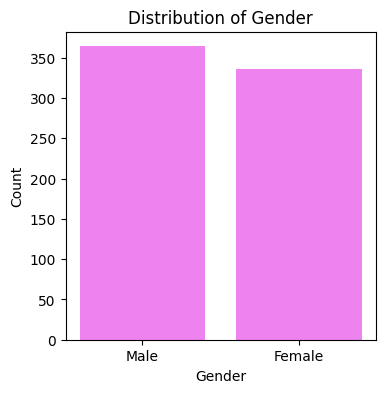

In [13]:
z = df['Gender'].value_counts().reset_index()
plt.figure(figsize = (4,4))
plt.bar(z['Gender'], z['count'], color = 'violet')
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

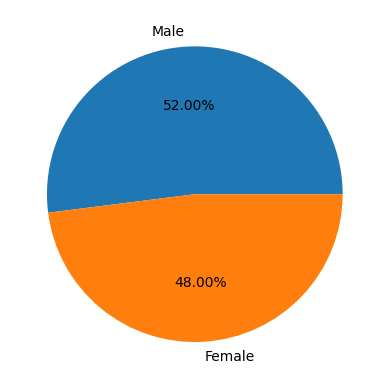

In [14]:
z1 = round((df['Gender'].value_counts()/df.shape[0])*100,2).reset_index()
labels = z1['Gender'].to_list()
plt.pie(z1['count'], labels = labels, autopct = '%.2f%%')
plt.show()

In [15]:
numerical_cols = ['App Usage Time (min/day)','Screen On Time (hours/day)','Battery Drain (mAh/day)', 
                  'Number of Apps Installed','Data Usage (MB/day)', 'Age']

Analysis on App Usage Time (min/day)


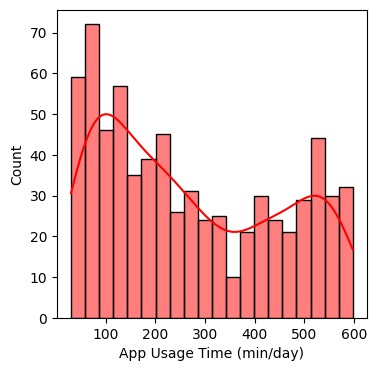

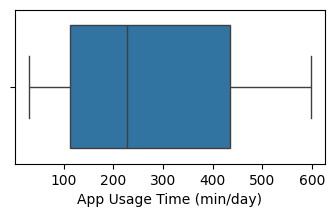

Analysis on Screen On Time (hours/day)


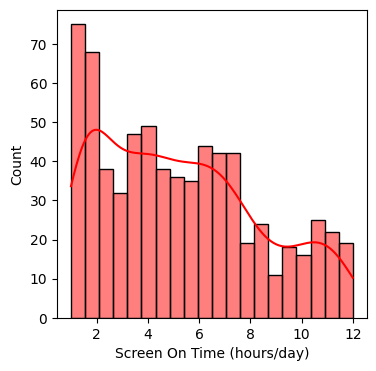

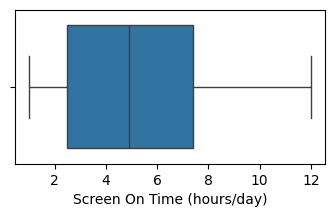

Analysis on Battery Drain (mAh/day)


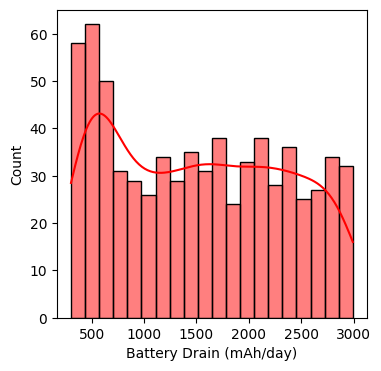

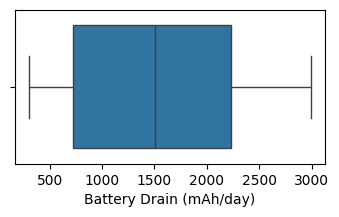

Analysis on Number of Apps Installed


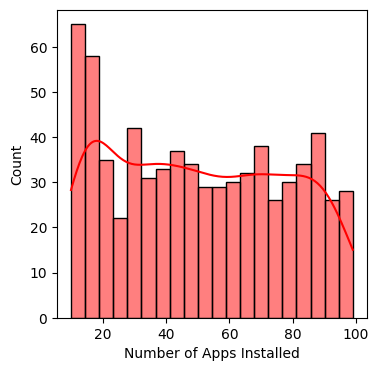

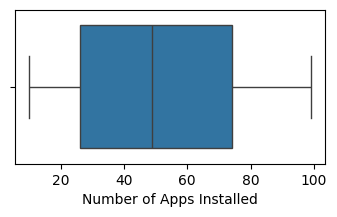

Analysis on Data Usage (MB/day)


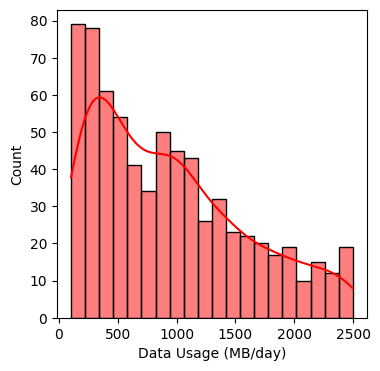

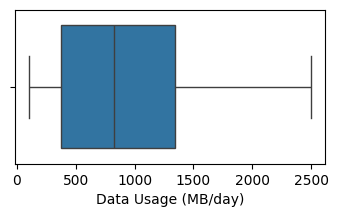

Analysis on Age


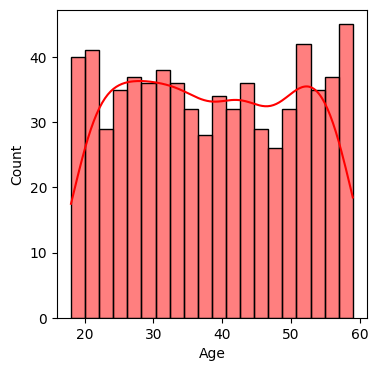

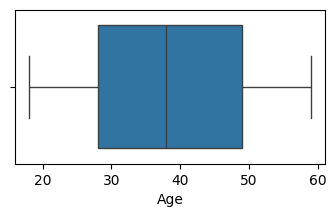

In [16]:
for col in numerical_cols:
    plt.figure(figsize = (4,4))
    print('Analysis on', col)
    sns.histplot(df[col], bins = 20, kde = True, color = 'red')
    plt.figure(figsize = (4,2))
    sns.boxplot(x = df[col])
    plt.show()

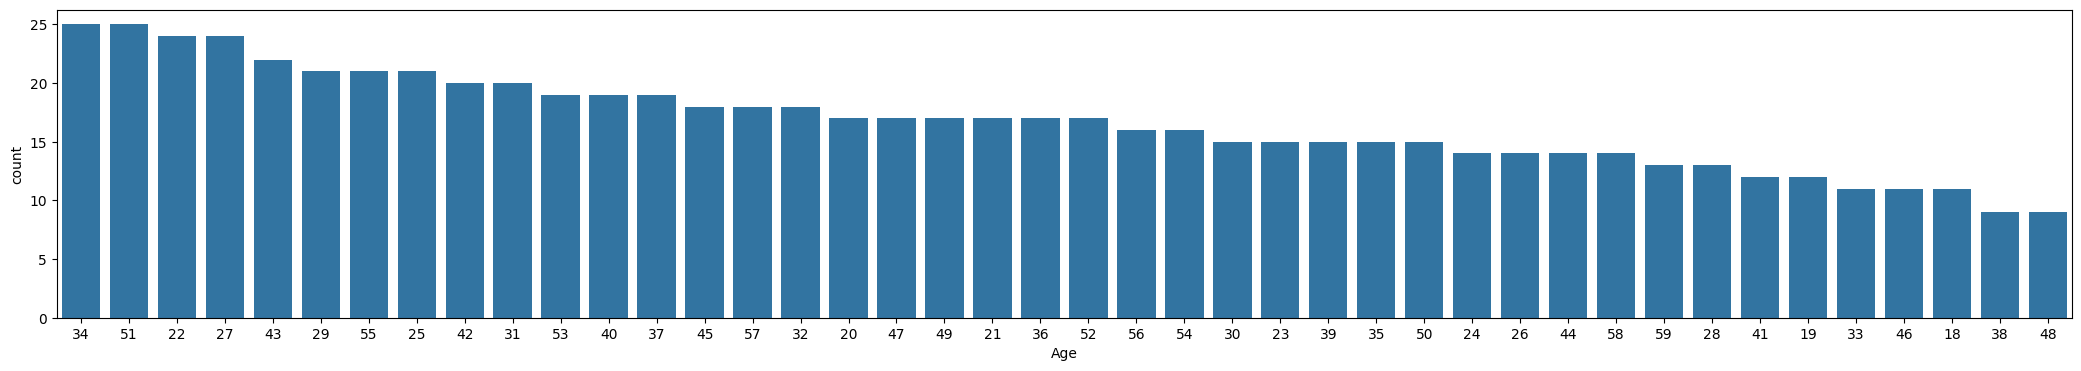

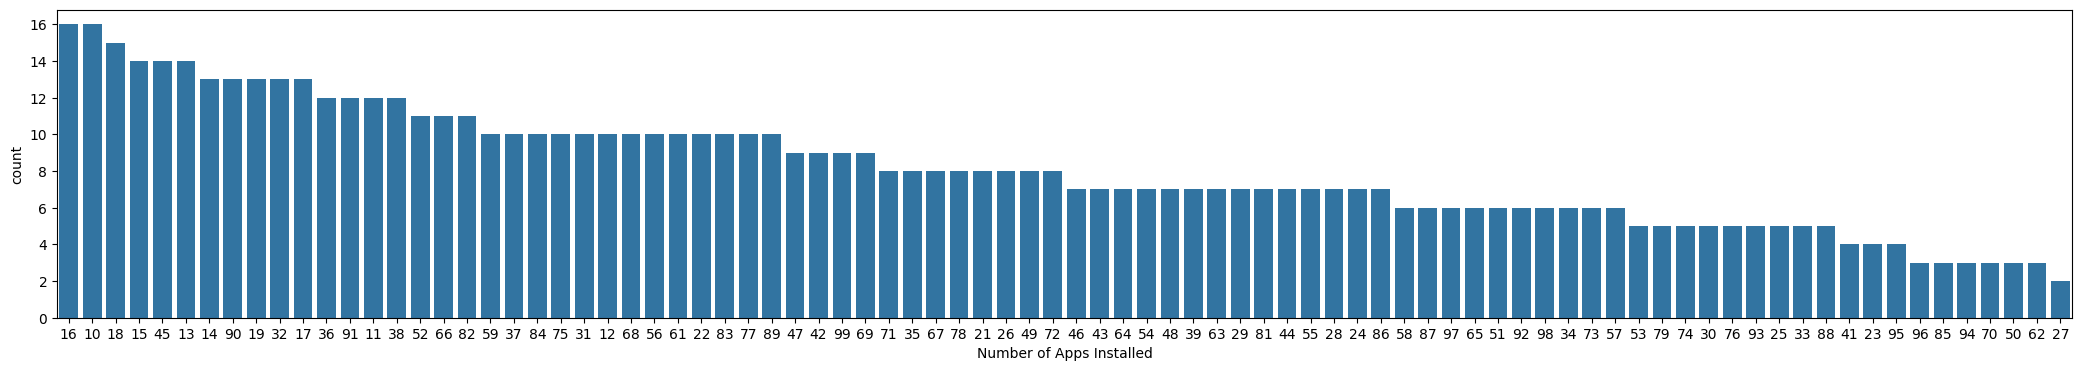

In [17]:
cols = ['Age', 'Number of Apps Installed']
for col in cols:
    plt.figure(figsize = (26,4))
    sorted_order = df[col].value_counts().index
    sns.countplot(x = df[col], order = sorted_order)
    plt.show()

BIVARIATE ANALYSIS & MULTIVARIATE ANALYSIS


Device Model vs Operating System

In [18]:
cross_tab = pd.crosstab(df['Device Model'], df['Operating System'])

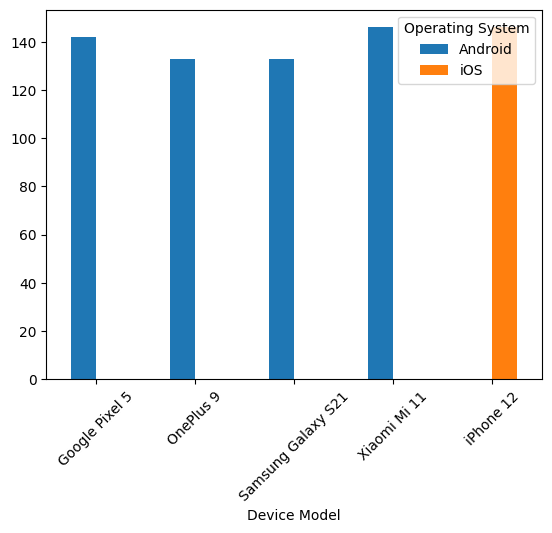

In [20]:
cross_tab.plot(kind='bar')
plt.xticks(rotation = 45)
plt.show()

In [21]:
num_cols = ['Screen On Time (hours/day)',
       'Battery Drain (mAh/day)', 'Number of Apps Installed',
       'Data Usage (MB/day)', 'Age',
       'App Usage Time (min/day)']

Analysis on Screen On Time (hours/day)


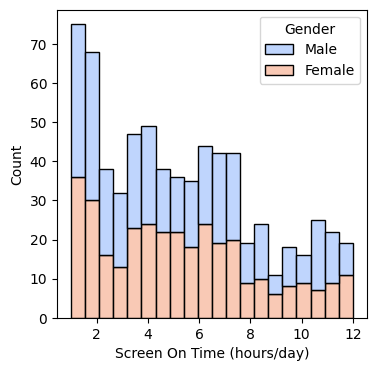

<Figure size 400x200 with 0 Axes>

Analysis on Battery Drain (mAh/day)


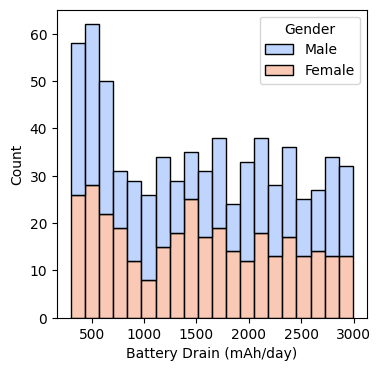

<Figure size 400x200 with 0 Axes>

Analysis on Number of Apps Installed


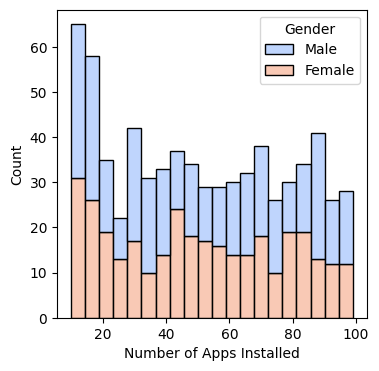

<Figure size 400x200 with 0 Axes>

Analysis on Data Usage (MB/day)


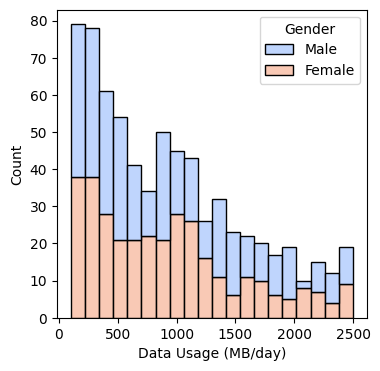

<Figure size 400x200 with 0 Axes>

Analysis on Age


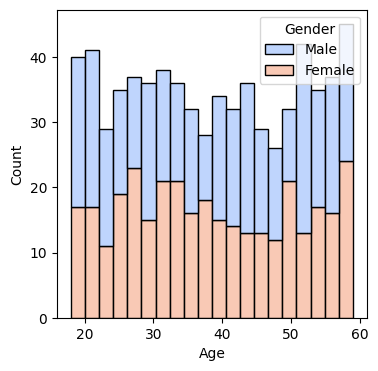

<Figure size 400x200 with 0 Axes>

Analysis on App Usage Time (min/day)


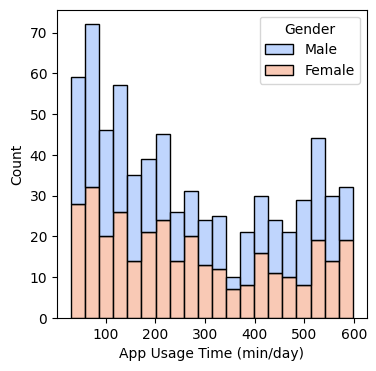

<Figure size 400x200 with 0 Axes>

In [22]:
for col in num_cols:
    plt.figure(figsize = (4,4))
    print('Analysis on', col)
    sns.histplot(x = col, bins = 20, hue = 'Gender', data = df, multiple='stack', palette='coolwarm')
    plt.figure(figsize = (4,2))
    plt.show()

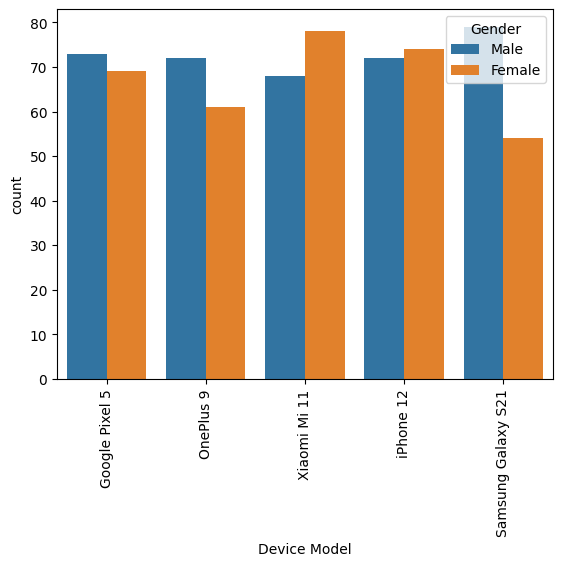

In [23]:
sns.countplot(x = 'Device Model', hue = 'Gender', data = df)
plt.xticks(rotation = 90)
plt.show()

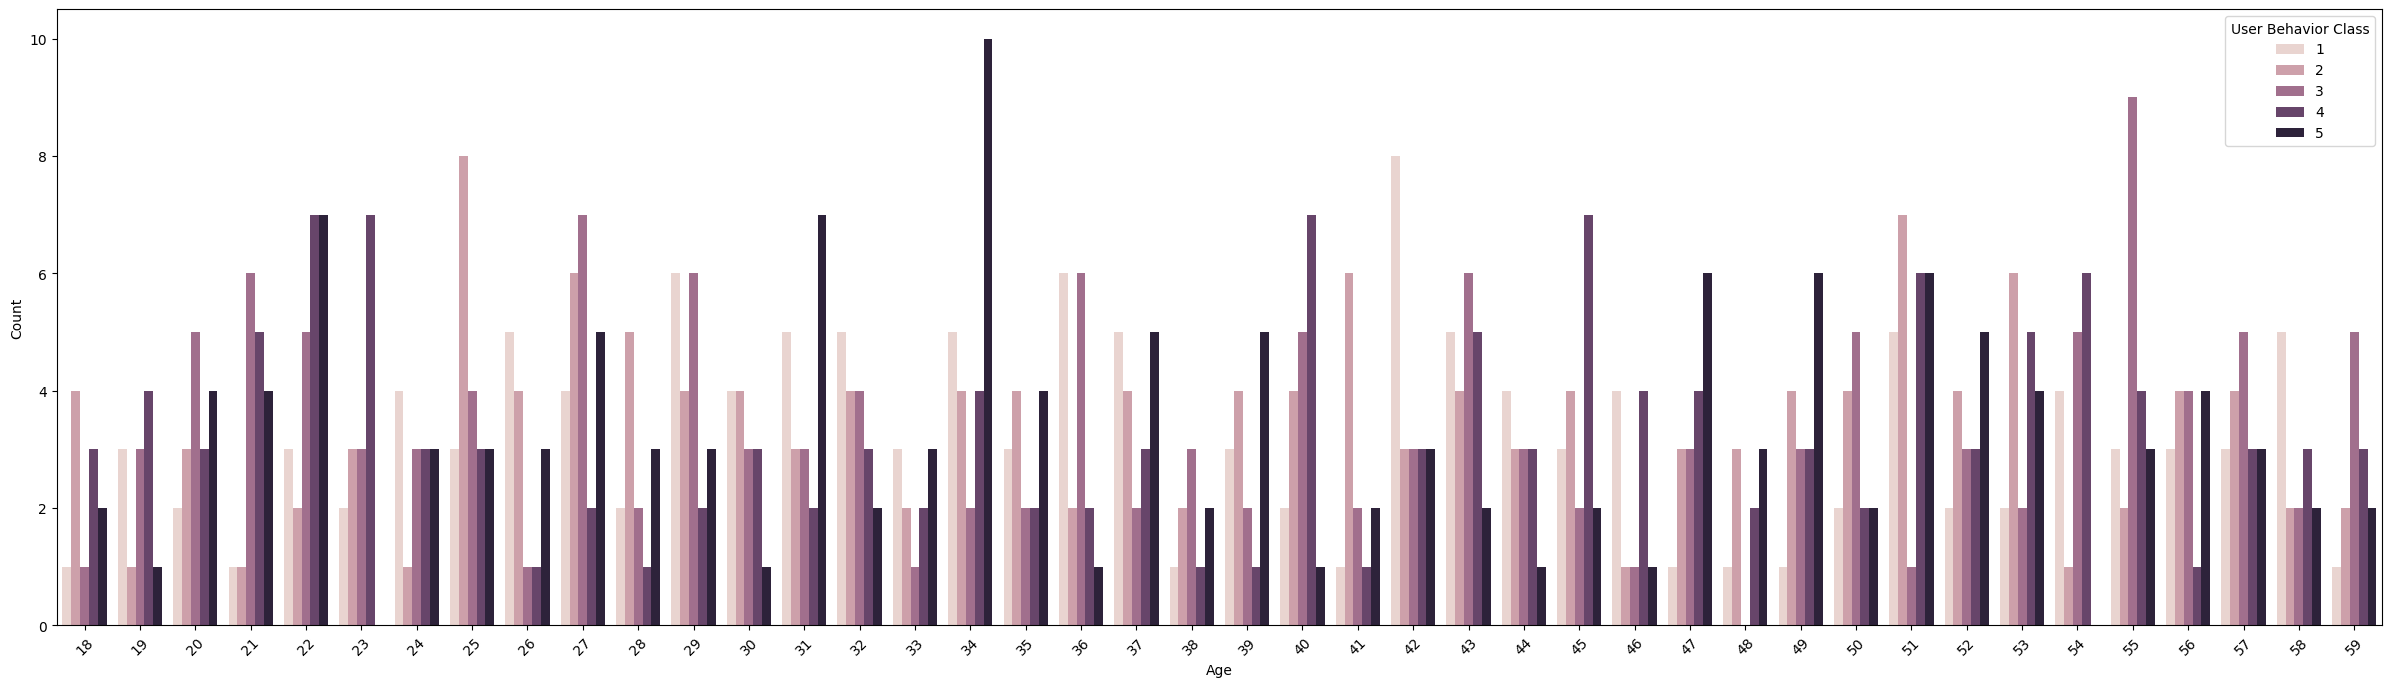

In [26]:
plt.figure(figsize = (30,8))
crosstab_reset = pd.crosstab(df['User Behavior Class'], df['Age']).reset_index()
crosstab_melted = crosstab_reset.melt(id_vars='User Behavior Class', var_name='Age', value_name='Count')
sns.barplot(data=crosstab_melted, x='Age', y='Count', hue='User Behavior Class')
plt.xticks(rotation = 45)
plt.show()

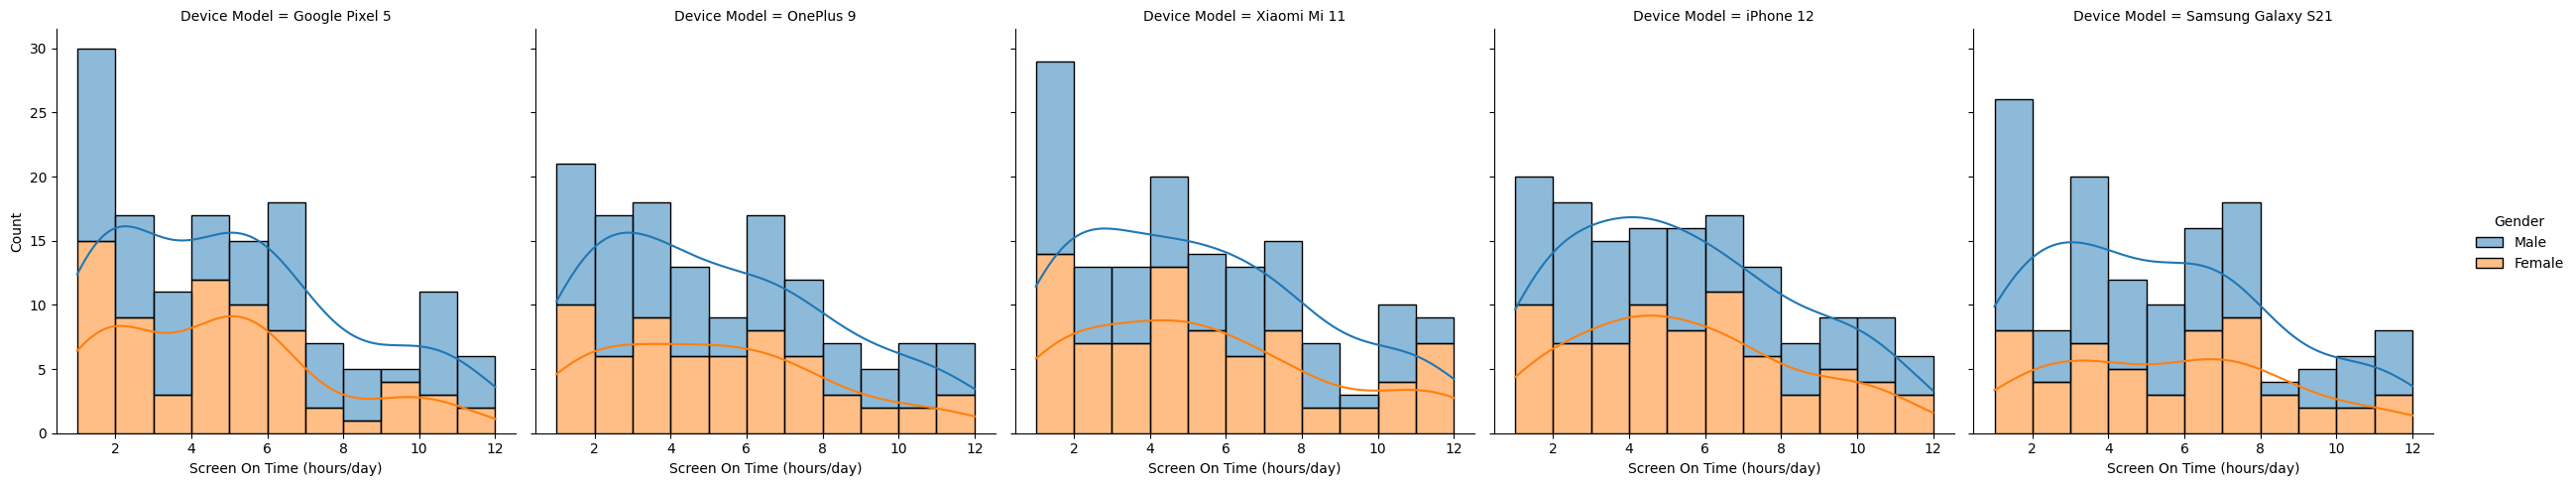

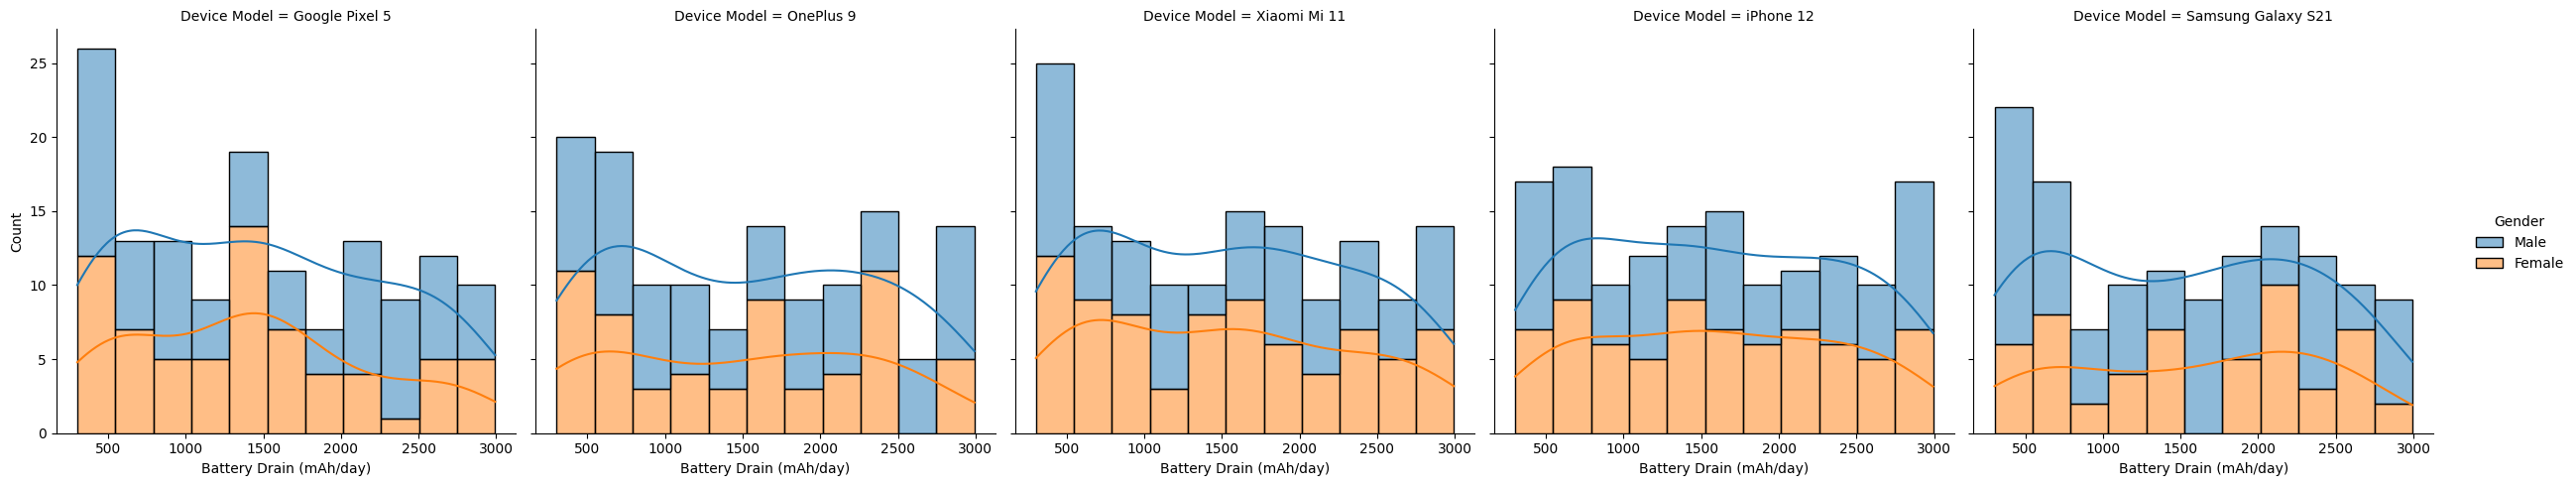

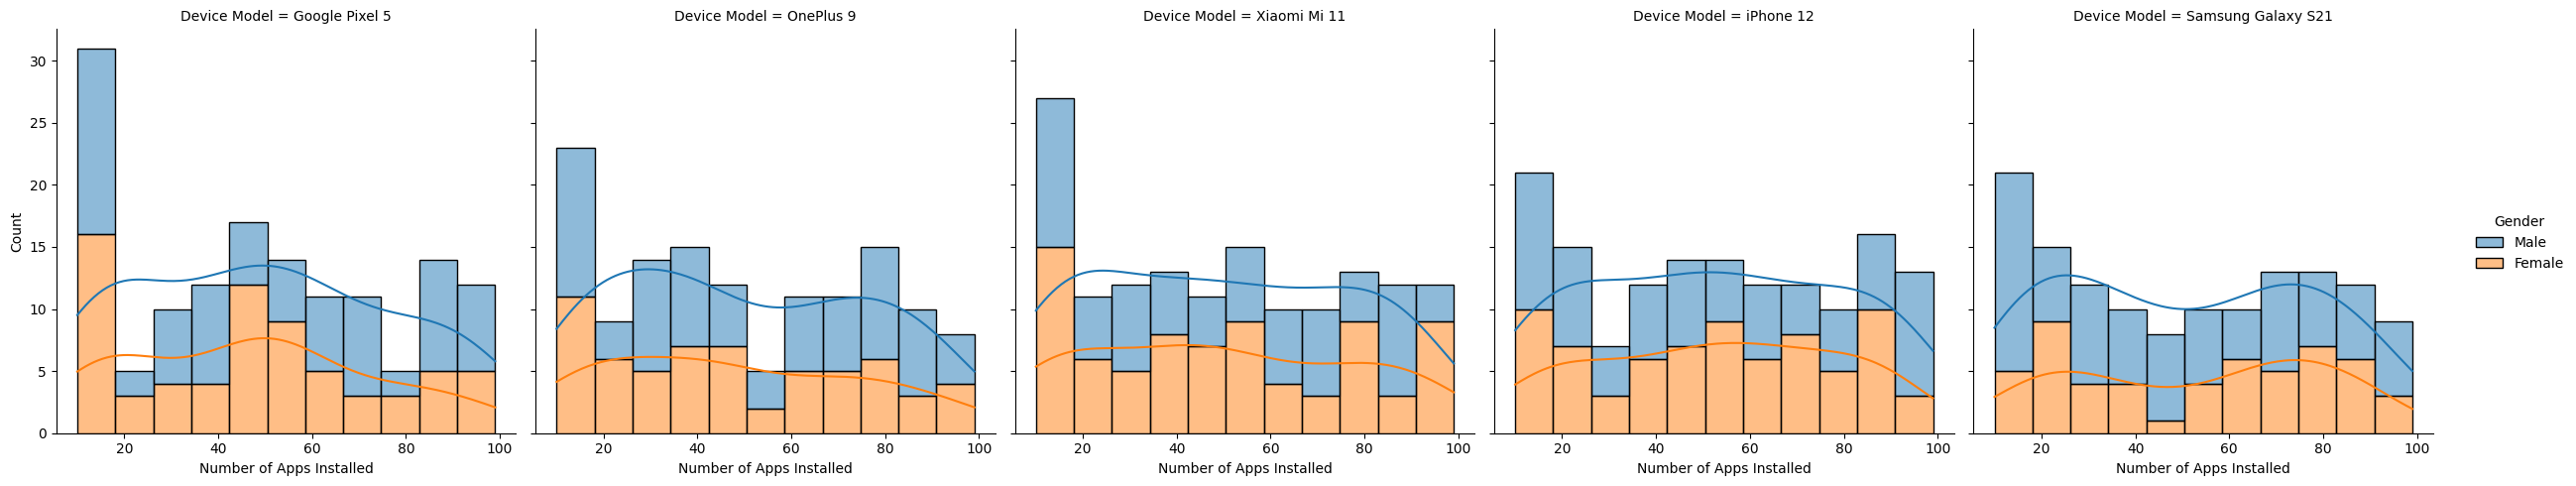

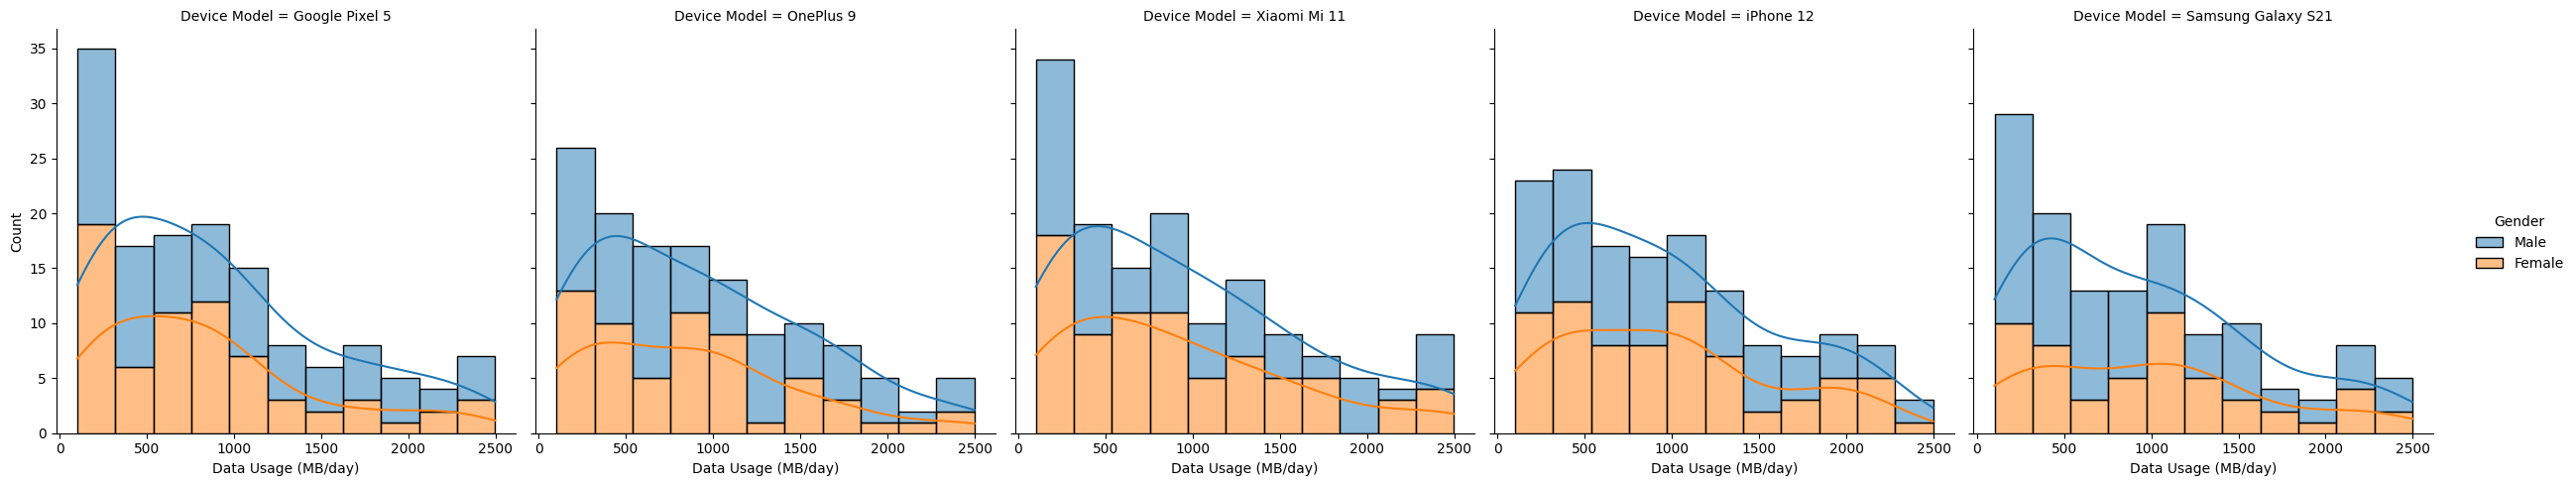

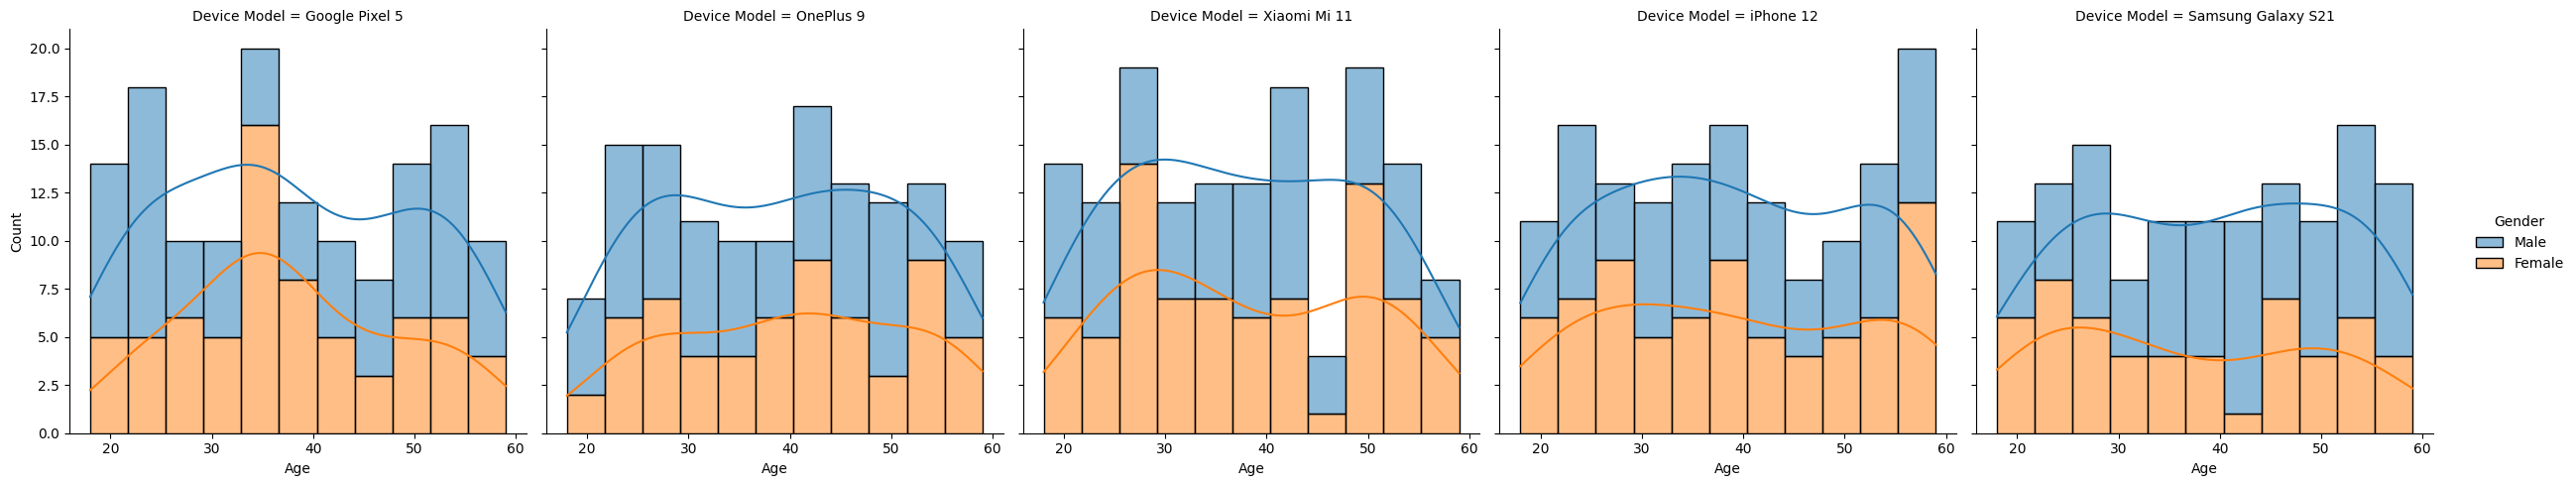

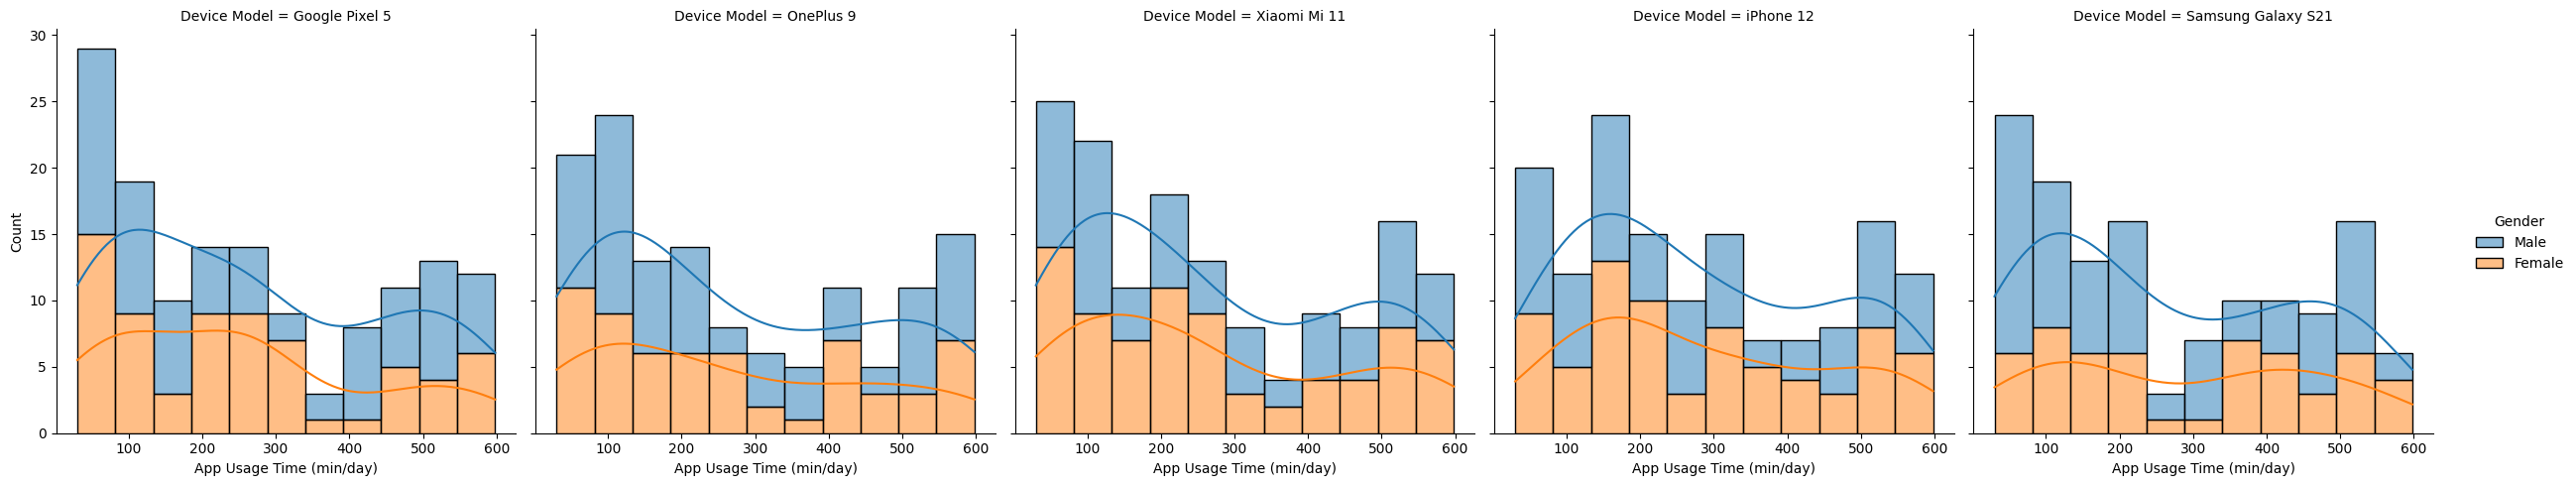

In [28]:
for col in num_cols: 
    sns.displot(data=df, x=col, col="Device Model", kde=True, hue = 'Gender', multiple = 'stack')
    plt.show()

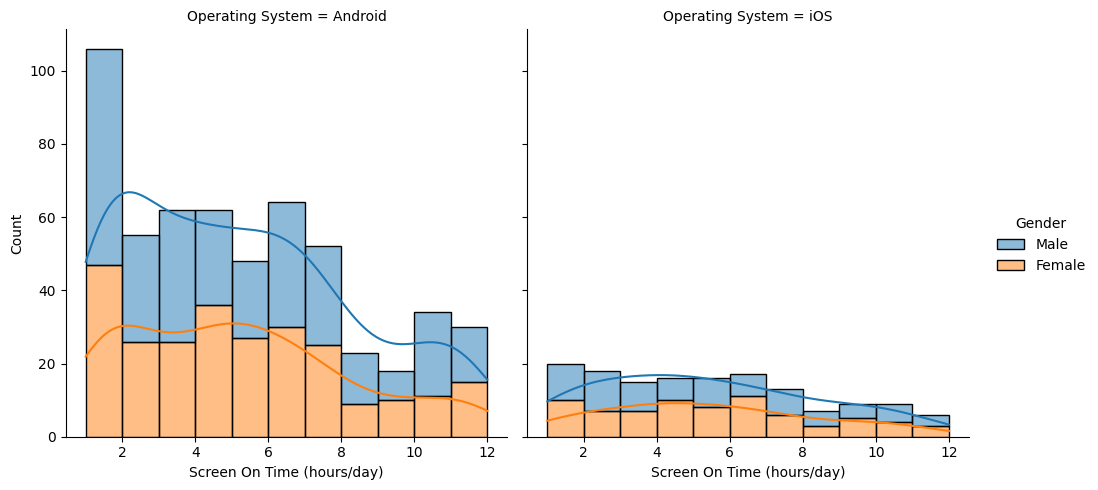

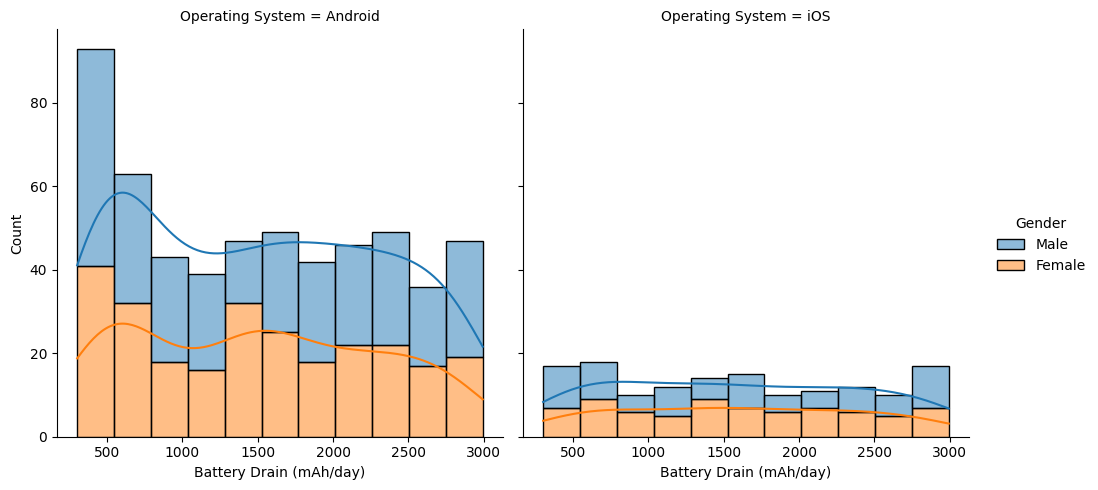

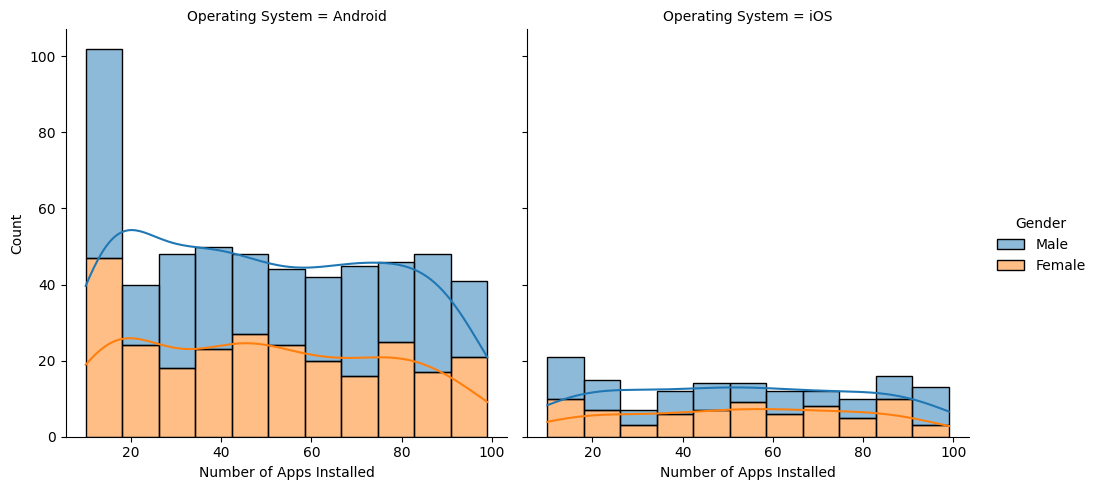

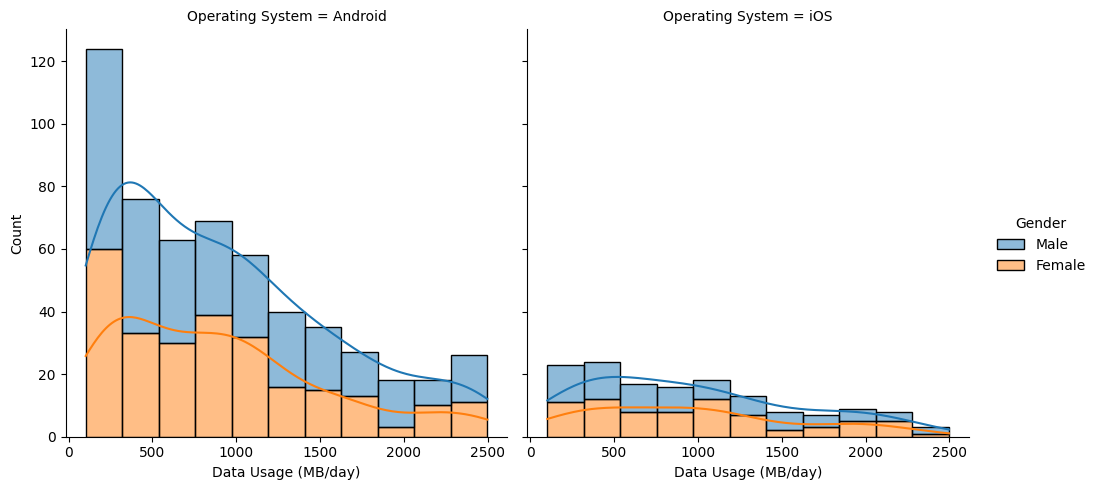

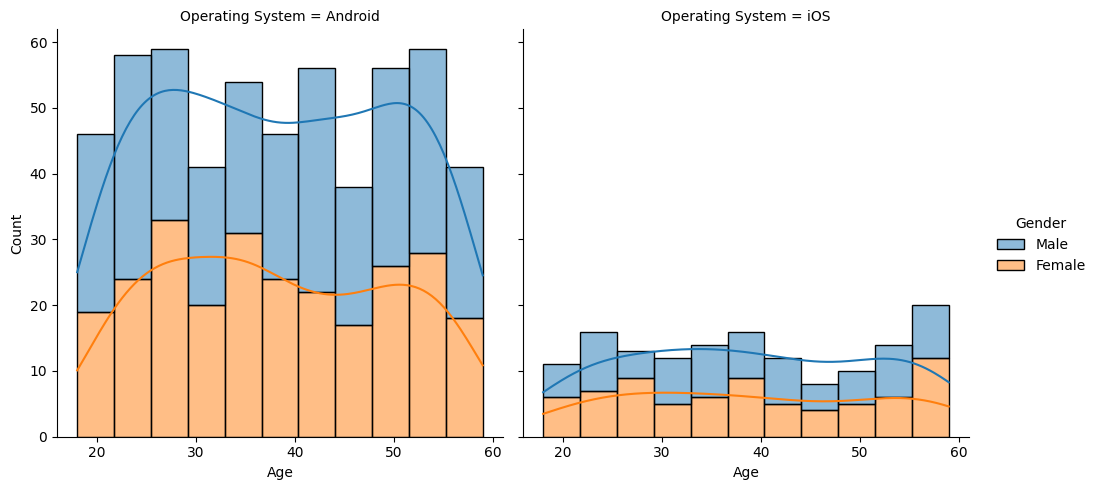

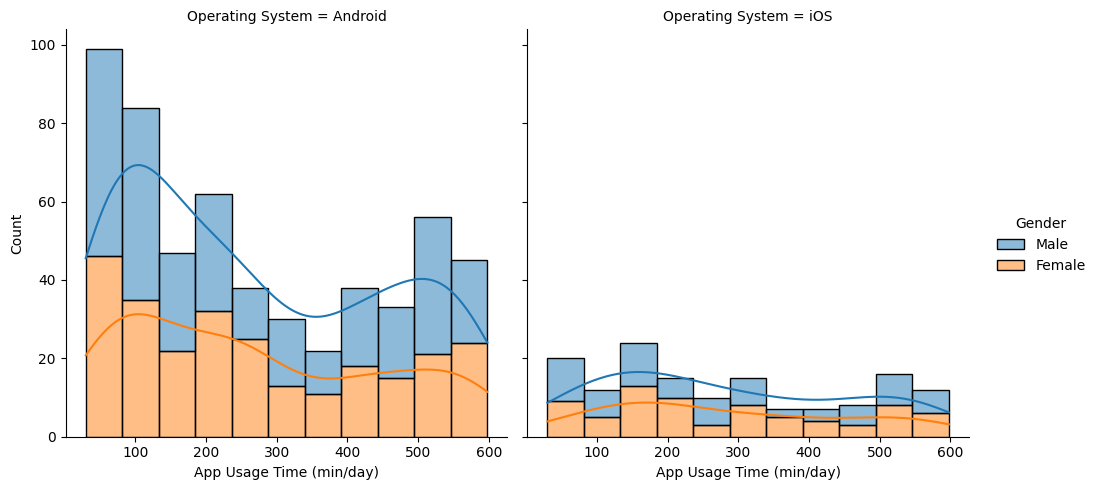

In [29]:
for col in num_cols: 
    sns.displot(data=df, x=col, col="Operating System", kde=True, hue = 'Gender', multiple = 'stack')
    plt.show()

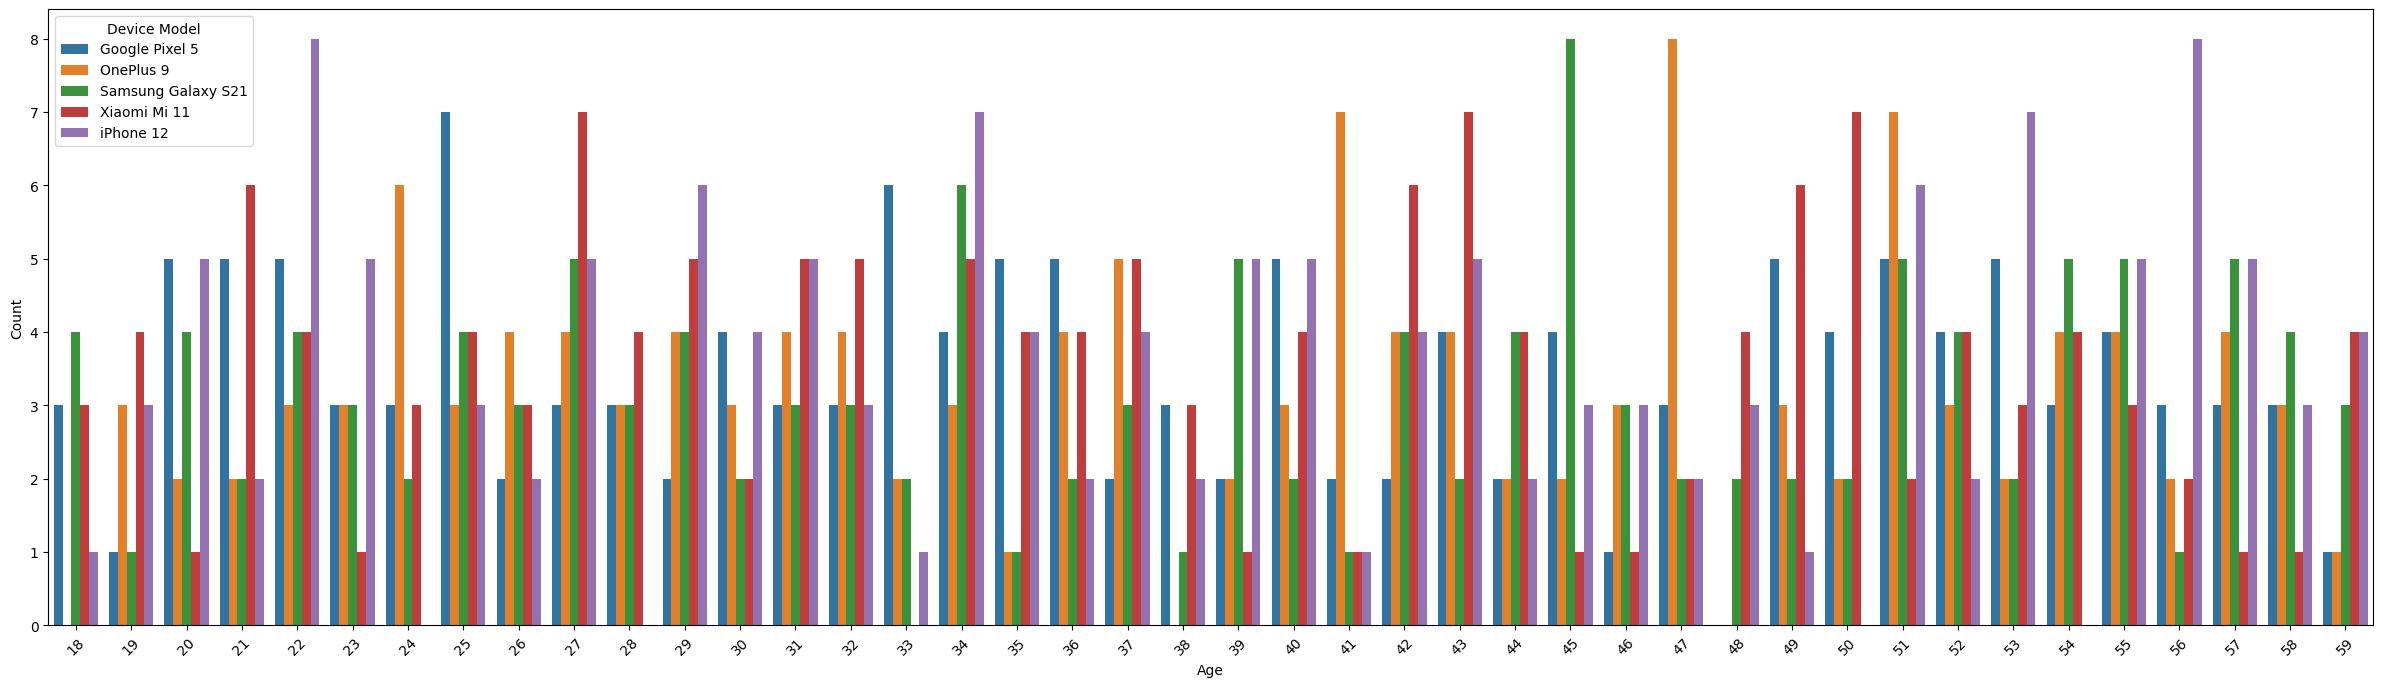

In [30]:
plt.figure(figsize = (30,8))
crosstab_reset2 = pd.crosstab(df['Device Model'], df['Age']).reset_index()
crosstab_melted2 = crosstab_reset2.melt(id_vars='Device Model', var_name='Age', value_name='Count')
sns.barplot(data=crosstab_melted2, x='Age', y='Count', hue='Device Model')
plt.xticks(rotation = 45)
plt.show()

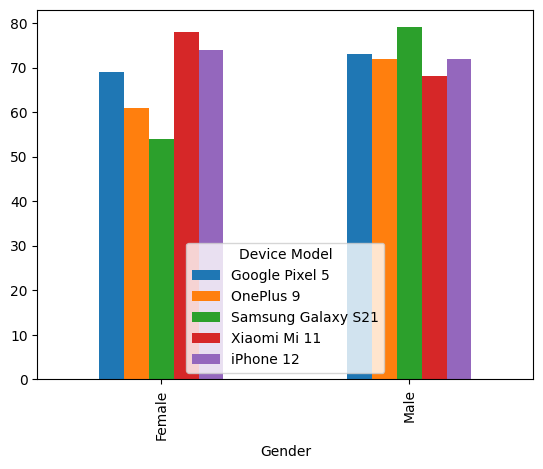

In [31]:
pd.crosstab(df['Gender'], df['Device Model']).plot(kind='bar')
plt.show()

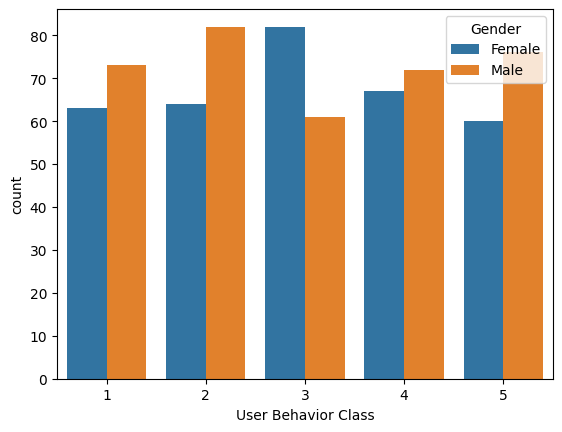

In [32]:
sns.countplot(x='User Behavior Class', hue='Gender', data=df)
plt.show()